# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Maria Goretti Risadniati Madsun
- Email: risadniati@gmail.com
- Id Dicoding:icachan47

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penyewaan sepeda selama tahun 2011 hingga 2012?
- Bagaimana pola perkembangan penyewaan sepeda pada masing-masing tahun ?
- Bagaimana pengaruh musim dalam bisnis penyewaan sepeda ?
- Bagaimana tren peminjaman sepeda berdasarkan waktu operasional ?

## Mempersiapkan semua library yang dibutuhkan

- NumPy - array multidimensi & fungsi matematika
- Pandas - menyediakan DataFrame
- Matplotlib - membuat grafik (garis, scatter, histogram dll)
- Seaborn - membuat plot kompleks dari set data




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

- Load tabel day

In [ ]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


- Load tabel hour

In [ ]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Penjelasan terkait data (berdasarkan sumber data) :
- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

### Assessing Data

#### Penilaian data day_df

##### Tipe Data pada day_df

Untuk melakukan pemeriksaan tipe data, dapat digunakan fungsi .info() yang akan menampilkan kolom, non-null count dan tipe data.

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Pada tabel day_df, seluruh data berjumlah 731 baris. Semua data telah lengkap karena tidak ada selisih data atau data yang null. Namun, perlu dicermati pada kolom dteday yang berisi tanggal, tipe data masih kurang tepat yaitu object, seharusnya tipe data ini adalah datetime.

##### Duplikasi pada Data day_df

Pemeriksaan duplikasi data dapat dilakukan dengan fungsi duplicated() yang diikuti oleh sum(). Fungsi sum() akan menghitung jumlah data duplikat.

In [ ]:
print('Jumlah duplikasi pada day_df: ', day_df.duplicated().sum())

Jumlah duplikasi pada day_df:  0


Berdasarkan pemeriksaan, tidak ada data yang duplikat pada day_df.

##### Parameter Statistik day_df

Untuk memeriksa parameter statistik yang memuat ringkasan seperti mean, median dan lainnya, digunakan metode describe().

In [ ]:
print("Parameter statistik pada day_df:")
day_df.describe()

Parameter statistik pada day_df:


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Melalui pemeriksaan parameter statistik, tidak ada anomali pada seluruh data. Namun, untuk isi kolom yr akan diganti menjadi nilai aslinya yaitu tahun 2011-2012 agar dapat lebih mudah dipahami dalam visualisasi data.

#### Penilaian Data hour_df

##### Tipe Data pada hour_df

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Pada data hour_df, data berjumlah 17379 baris. Seluruh data lengkap dengan tidak adanya selisih ataupun kolom null. Melalui pemeriksaan, tipe data pada kolom dteday kurang tepat jika memuat informasi mengenai tanggal, tipe data yang benar adalah datetime, bukan object.
Proses penggantian tipe data akan dilakukan pada tahap berikutnya.


##### Duplikasi pada Data hour_df

In [ ]:
print("Jumlah duplikasi pada hour_df: ", hour_df.duplicated().sum())

Jumlah duplikasi pada hour_df:  0


##### Parameter Statistik pada hour_df

In [ ]:
print("Parameter statistik pada hour_df:")
hour_df.describe()

Parameter statistik pada hour_df:


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Melalui pemeriksaan parameter statistik pada hour_df, tidak ada anomali pada hasil statistik. Hal ini dapat dilihat dari nilai minimal, maksimal maupun rata-rata dari setiap kolom yang sesuai dengan keterangan skala pada keterangan tabel. Sebagai contoh untuk season, keterangan yang digunakan adalah 1-4, nilai minimal = 1, nilai maksimal = 4 yang masing-masing menunjukkan musim tertentu.

Namun, sama seperti data pada day_df, untuk isi kolom yr akan diganti dari 0 menjadi 2011 dan 1 menjadi 2012

#### Ringkasan pemeriksaan data day_df dan hour_df

- Kedua data day_df dan hour_df memiliki jumlah data yang lengkap dan tanpa duplikasi.
- Data day_df dan hour_df memiliki tipe data yang kurang tepat pada kolom dteday, tipe data seharusnya adalah datetime bukan object.
- Perlu dilakukan penggantian nilai pada kolom yr dengan nilai sebenarnya.

### Cleaning Data

Pada tahap ini, akan dilakukan pemrosesan masalah yang diindentifikasi pada tahap assessing data.

#### Cleaning Data day_df



- Pada day_df, tipe data dteday (object) akan diganti menjadi datetime dengan fungsi `to_datetime` sebagai berikut.

In [ ]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

Setelah menjalankan fungsi tersebut, dijalankan perintah untuk melihat tipe data tersebut sudah berhasil diubah atau belum. Pemeriksaan bisa dilakukan dengan metode `info()`

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Tipe data sudah berubah menjadi datetime, sehingga proses sudah berhasil.

- Penggantian nilai pada kolom yr

In [ ]:
# Kode untuk melakukan penggantian nilai pada kolom yr
day_df['yr'] = day_df['yr'].replace({0: 2011, 1: 2012})

# Melihat head dari day_df
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,2011,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,2011,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,2011,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,2011,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,2011,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Penggantian nilai pada kolom yr sudah berhasil. Ini dilakukan agar lebih mudah dalam memberikan keterangan saat dilakukan visualisasi data.

#### Cleaning Data hour_df



- Serupa seperti proses pada day_df, untuk tipe data dteday di hour_df diganti menjadi datetime dengan fungsi `to_datetime`.

In [ ]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

Kemudian dilakukan pemeriksaan tipe data dengan metode `info()`

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Proses sudah berhasil dilakukan karena tipe data dteday sudah berubah menjadi datetime.

- Penggantian nilai pada kolom yr

In [ ]:
# Kode untuk melakukan penggantian nilai pada kolom yr
hour_df['yr'] = hour_df['yr'].replace({0: 2011, 1: 2012})

# Melihat head dari hour_df
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,2011,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,2011,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,2011,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,2011,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,2011,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Tahun pada kolom yr sudah berhasil menjadi 2011 dan 2012.

## Exploratory Data Analysis (EDA)

### Explore Data day_df

#### Parameter Statistik Data day_df

Untuk mengeksplorasi data day_df, terlebih dahulu dilihat seluruh parameter statistik dengan menggunakan fungsi describe.

In [ ]:
day_df.describe(include='all')

<ipython-input-49-a3f85d0fb009>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include='all')


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,2011.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,2011.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,2011.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


#### Tren Penyewaan Sepeda Selama Tahun 2011 - 2012

Selanjutnya dapat dilihat bagaimana tren per bulan selama tahun 2011 dan 2012. Kode untuk melihat tren tersebut sebagai berikut.

In [ ]:
day_df.groupby(by=['mnth', 'yr']).cnt.sum()

mnth  yr  
1     2011     38189
      2012     96744
2     2011     48215
      2012    103137
3     2011     64045
      2012    164875
4     2011     94870
      2012    174224
5     2011    135821
      2012    195865
6     2011    143512
      2012    202830
7     2011    141341
      2012    203607
8     2011    136691
      2012    214503
9     2011    127418
      2012    218573
10    2011    123511
      2012    198841
11    2011    102167
      2012    152664
12    2011     87323
      2012    123713
Name: cnt, dtype: int64

Menurut proses di atas, dapat dilihat bahwa penyewaan sepeda pada tahun 2012 berkembang karena jumlah penyewaan yang lebih banyak dibandingkan tahun 2011, bahkan jumlahnya meningkat pesat jika dibandingkan berdasarkan bulan. Sebagai contoh, pada tahun 2011 bulan pertama, jumlah penyewa sepeda 38189, sedangkan pada bulan pertama di tahun 2012, jumlahnya menjadi 96744. Jumlah ini hampir 3 kali lipatnya dari tahun 2011.

Melihat tren penyewaan sepeda tertinggi hingga terendah

In [ ]:
day_df.groupby(by=['yr', 'mnth']).agg({
    'cnt': 'sum'
}).sort_values(by='cnt', ascending=False)

cnt
yr   mnth        
2012 9     218573
     8     214503
     7     203607
     6     202830
     10    198841
     5     195865
     4     174224
     3     164875
     11    152664
2011 6     143512
     7     141341
     8     136691
     5     135821
     9     127418
2012 12    123713
2011 10    123511
2012 2     103137
2011 11    102167
2012 1      96744
2011 4      94870
     12     87323
     3      64045
     2      48215
     1      38189

Melalui data di atas, selama tahun 2011 hingga 2012, penyewaan sepeda tertinggi ada pada tahun 2012, bulan 9, dan terendah adalah pada bulan 1 tahun 2011.

#### Tren penyewaan sepeda pada masing-masing tahun

Untuk tahun 2011, dapat dilihat tren penyewaan sepeda sebagai berikut

In [ ]:
# Membuat filter data untuk tahun 2011
day_df_2011 = day_df[day_df['yr'] == 2011]

# Tren per bulan pada tahun 2011
print('Tren penyewaan sepeda selama tahun 2011:')
print(day_df_2011.groupby(by='mnth').cnt.sum())

print('\nPenyewaan tertinggi - terendah 2011 :')
print(day_df_2011.groupby(by='mnth').cnt.sum().sort_values(ascending=False))

Tren penyewaan sepeda selama tahun 2011:
mnth
1      38189
2      48215
3      64045
4      94870
5     135821
6     143512
7     141341
8     136691
9     127418
10    123511
11    102167
12     87323
Name: cnt, dtype: int64

Penyewaan tertinggi - terendah 2011 :
mnth
6     143512
7     141341
8     136691
5     135821
9     127418
10    123511
11    102167
4      94870
12     87323
3      64045
2      48215
1      38189
Name: cnt, dtype: int64


Sedangkan pada tahun 2012, perkembangannya sebagai berikut.

In [ ]:
# Membuat filter data untuk tahun 2012
day_df_2012 = day_df[day_df['yr'] == 2012]

# Tren per bulan pada tahun 2012
print('Tren penyewaan sepeda selama tahun 2012:')
print(day_df_2012.groupby(by='mnth').cnt.sum())

print('\nPenyewaan tertinggi - terendah 2012 :')
print(day_df_2012.groupby(by='mnth').cnt.sum().sort_values(ascending=False))

Tren penyewaan sepeda selama tahun 2012:
mnth
1      96744
2     103137
3     164875
4     174224
5     195865
6     202830
7     203607
8     214503
9     218573
10    198841
11    152664
12    123713
Name: cnt, dtype: int64

Penyewaan tertinggi - terendah 2012 :
mnth
9     218573
8     214503
7     203607
6     202830
10    198841
5     195865
4     174224
3     164875
11    152664
12    123713
2     103137
1      96744
Name: cnt, dtype: int64


#### Pengaruh musim terhadap penyewaan sepeda

Selanjutnya akan dilakukan eksplorasi data day_df untuk melihat pengaruh musim pada penyewaan sepeda. Seperti yang telah dijelaskan, pada data ini digunakan nilai integer untuk mewakili masing-masing musim. Namun, hal ini sedikit membingungkan apabila kita tidak melihat keterangan pada data. Oleh karena itu, akan diubah terlebih dahulu nilai integer tersebut menjadi deskripsi musim yang sebenarnya, dimana :
- 1 : spring
- 2 : summer
- 3 : fall
- 4 : winter

Berikut ini langkah substitusinya, pada kode berikut, deskripsi musim akan disimpan dalam kolom baru 'season_'.

In [ ]:
# Menambah kolom untuk season dengan nilai sebenarnya
day_df['season_'] = day_df['season'].replace({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_
0,1,2011-01-01,1,2011,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,spring
1,2,2011-01-02,1,2011,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,spring
2,3,2011-01-03,1,2011,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,spring
3,4,2011-01-04,1,2011,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,spring
4,5,2011-01-05,1,2011,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,2012,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114,spring
727,728,2012-12-28,1,2012,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095,spring
728,729,2012-12-29,1,2012,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341,spring
729,730,2012-12-30,1,2012,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796,spring


Kolom 'season_' yang berisi deskripsi musim sudah terbentuk. Selanjutnya, dilakukan analisa untuk melihat pengaruh musim terhadap jumlah penyewaan sepeda seperti berikut.

In [ ]:
day_df.groupby(by='season_').cnt.sum()

season_
fall      1061129
spring     471348
summer     918589
winter     841613
Name: cnt, dtype: int64

Berdasarkan data yang fluktuatif, dapat dilihat bahwa musim cukup berpengaruh terhadap besarnya penyewaan sepeda. Jumlah penyewaan sepeda tertinggi adalah pada musim fall atau musim gugur.

### Eksplorasi Data hour_df

#### Parameter Statistik Data hour_df

Melihat data hour_df dan parameter statistiknya dengan fungsi info()

In [ ]:
hour_df.describe(include = 'all')

<ipython-input-56-8d167b2b3af7>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hour_df.describe(include = 'all')


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,2011.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,2011.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,2011.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


#### Pengaruh waktu operasional terhadap besarnya penyewa sepeda

Selanjutnya akan dilihat bagaimana pengaruh waktu operasional terhadap besarnya penyewa sepeda dengan kode berikut, dimana data dikelompokkan berdasarkan jam pada kolom 'hr' dan dihitung jumlah data yang terdapat pada kolom 'cnt' dengan fungsi sum().

In [ ]:
print('Pola penyewaan sepeda berdasarkan waktu operasional')
print(hour_df.groupby(by=['hr']).cnt.sum())

print('\nUrutan penyewaan sepeda yang tertinggi hingga terendah berdasarkan waktu')
print(hour_df.groupby(by=['hr']).cnt.sum().sort_values(ascending=False))

Pola penyewaan sepeda berdasarkan waktu operasional
hr
0      39130
1      24164
2      16352
3       8174
4       4428
5      14261
6      55132
7     154171
8     261001
9     159438
10    126257
11    151320
12    184414
13    184919
14    175652
15    183149
16    227748
17    336860
18    309772
19    226789
20    164550
21    125445
22     95612
23     63941
Name: cnt, dtype: int64

Urutan penyewaan sepeda yang tertinggi hingga terendah berdasarkan waktu
hr
17    336860
18    309772
8     261001
16    227748
19    226789
13    184919
12    184414
15    183149
14    175652
20    164550
9     159438
7     154171
11    151320
10    126257
21    125445
22     95612
23     63941
6      55132
0      39130
1      24164
2      16352
5      14261
3       8174
4       4428
Name: cnt, dtype: int64


Waktu operasional berpengaruh terhadap banyaknya penyewa sepeda, dapat dilihat dari variasi jumlah penyewa setiap jamnya. Menurut data, jam operasional terpadat adalah pada jam 17, sedangkan pada jam 4 pagi merupakan jam operasional paling lengang.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren penyewaan sepeda selama tahun 2011 hingga 2012?

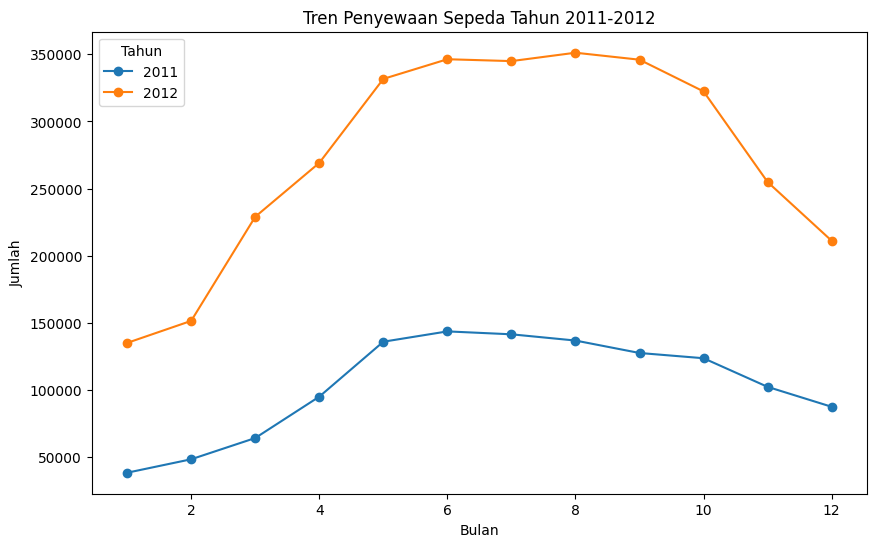

In [ ]:
# Melakukan grouping berdasarkan bulan dan tahun, serta menghitung total penyewaan
tren_per_bulan_tahun = day_df.groupby(by=['mnth', 'yr']).cnt.sum()

# Mengubah hasil groupby menjadi DataFrame dengan tujuan memudahkan plotting
tren_per_bulan_tahun = tren_per_bulan_tahun.unstack()

# Membuat plot grafik garis yang bertumpuk
tren_per_bulan_tahun.plot(kind='line', stacked=True, marker='o', figsize=(10,6))
plt.title('Tren Penyewaan Sepeda Tahun 2011-2012')
plt.xlabel('Bulan')
plt.ylabel('Jumlah')
plt.legend(title='Tahun', loc='upper left')

# Menampilkan plot
plt.show()

Berdasarkan grafik di atas, pencapaian penyewaan sepeda pada tahun 2012 meningkat pesat jika dibandingkan dengan tahun 2011. Grafik bergerak naik dari awal tahun hingga bulan ke-6 dan sedikit mengalami kestabilan hingga bulan ke-9, namun mengalami penurunan dari bulan 10 hingga 12.

### Pertanyaan 2 : Bagaimana pola perkembangan penyewaan sepeda pada masing-masing tahun ?

Perkembangan pada tahun 2011 :

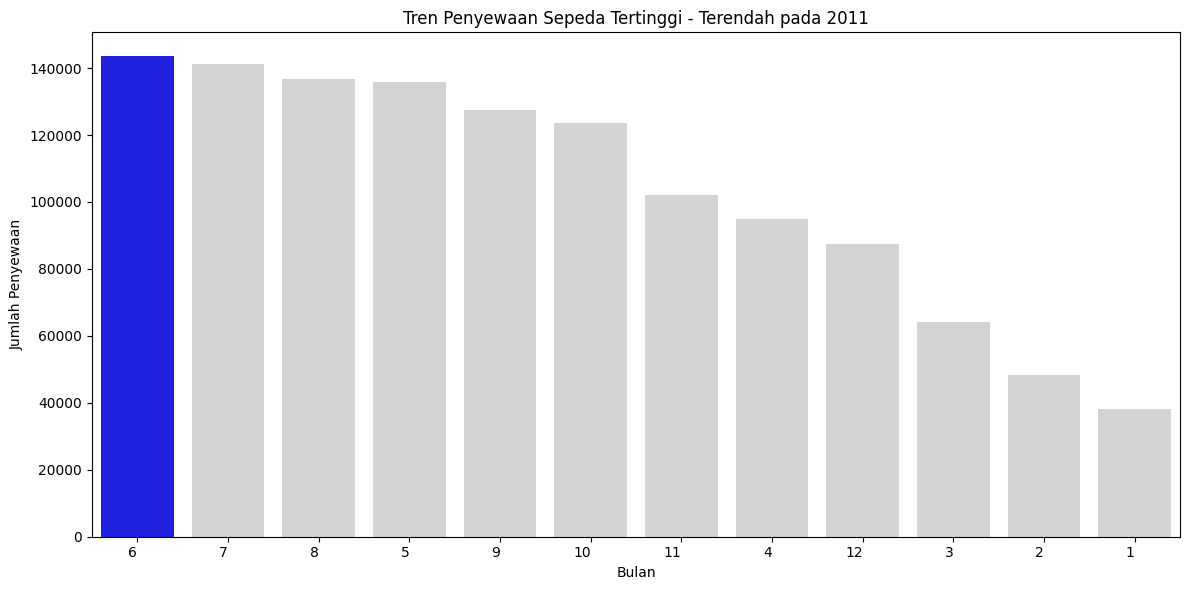

In [ ]:
day_df_2011.groupby(by='mnth').cnt.sum().sort_values(ascending=False)

# Menghitung jumlah penyewaan per bulan dan mengurutkannya dari yang tertinggi ke terendah
monthly_counts = day_df_2011.groupby(by='mnth').cnt.sum().sort_values(ascending=False).reset_index()

# Mengatur palet warna untuk Seaborn
colors = ['blue'] + ['lightgrey'] * (len(monthly_counts) - 1)

# Membuat grafik menggunakan Matplotlib
plt.figure(figsize=(12, 6))
sns.barplot(x='mnth', y='cnt', data=monthly_counts, order=monthly_counts['mnth'], palette=colors)
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan')
plt.title('Tren Penyewaan Sepeda Tertinggi - Terendah pada 2011')
plt.xticks(rotation=0, ha='right')
plt.tight_layout()

plt.show()

Perkembangan tahun 2012 :

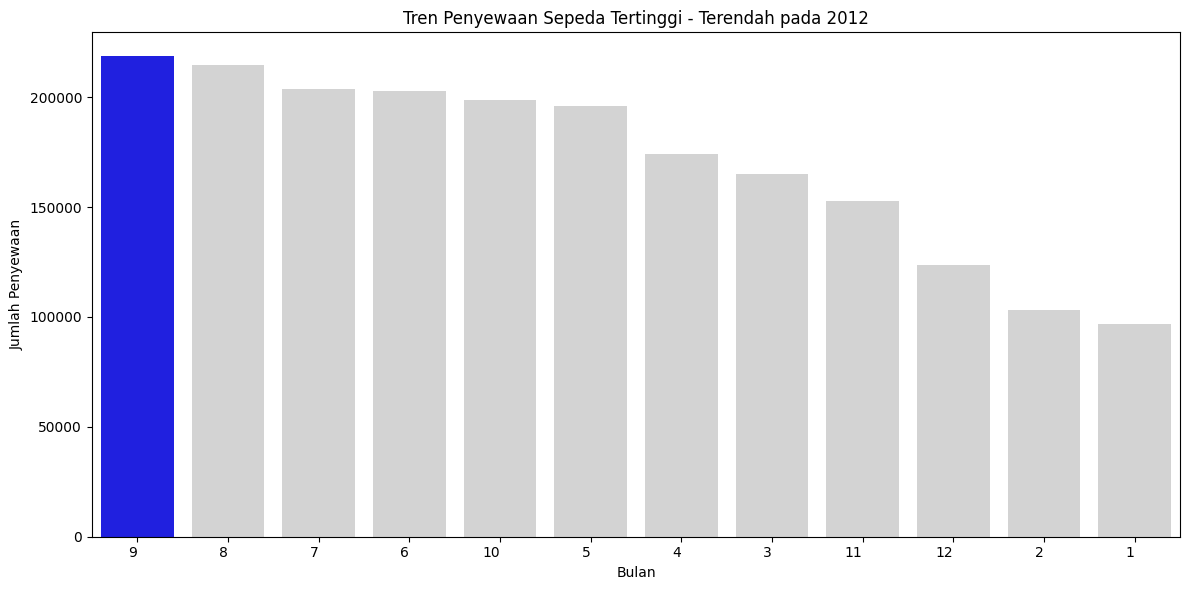

In [ ]:
day_df_2012.groupby(by='mnth').cnt.sum().sort_values(ascending=False)

# Menghitung jumlah penyewaan per bulan dan mengurutkannya dari yang tertinggi ke terendah
monthly_counts = day_df_2012.groupby(by='mnth').cnt.sum().sort_values(ascending=False).reset_index()

# Mengatur palet warna untuk Seaborn
colors = ['blue'] + ['lightgrey'] * (len(monthly_counts) - 1)

# Membuat grafik menggunakan Matplotlib
plt.figure(figsize=(12, 6))
sns.barplot(x='mnth', y='cnt', data=monthly_counts, order=monthly_counts['mnth'], palette=colors)
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan')
plt.title('Tren Penyewaan Sepeda Tertinggi - Terendah pada 2012')
plt.xticks(rotation=0, ha='right')
plt.tight_layout()

plt.show()

Penyewaan sepeda tertinggi pada masing-masing tahun terjadi pada bulan 6 (2011) dan bulan 9 (2012). Sedangkan penyewaan sepeda terenda adalah pada bulan 1 di tahun 2011 dan 2012. Jika dilihat polanya, penyewaan sepeda yang cukup tinggi terjadi dari bulan 6 hingga 10 setiap tahunnya.

### Pertanyaan 3: Bagaimana pengaruh musim terhadap penyewaan sepeda ?

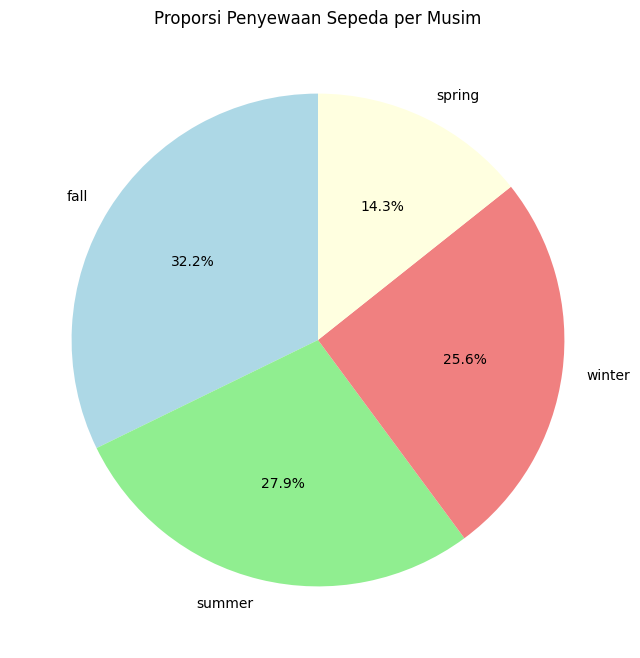

In [ ]:
day_df.groupby(by='season_').cnt.sum().sort_values(ascending=False).reset_index()

# Menghitung jumlah penyewaan per musim dan mengurutkannya dari yang tertinggi ke terendah
season_counts = day_df.groupby(by='season_').cnt.sum().sort_values(ascending=False).reset_index()

# Membuat diagram pie
plt.figure(figsize=(8, 8))
plt.pie(season_counts['cnt'], labels=season_counts['season_'], autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'lightcoral', 'lightyellow'])
plt.title('Proporsi Penyewaan Sepeda per Musim')
plt.show()

Berdasarkan data, musim cukup memberikan pengaruh pada besarnya jumlah penyewaan sepeda. Musim gugur (fall) adalah musim dengan persentase penyewaan sepeda terbanyak yaitu sebanyak 32.2%, diikuti dengan musim panas (summer) dengan persentase 27,9%, musim salju (winter) dengan persentase 25.6% dan yang terendah adalah pada musim semi (spring) sebesar 14.3%.

### Pertanyaan 4 : Bagaimana tren peminjaman sepeda berdasarkan waktu operasional?

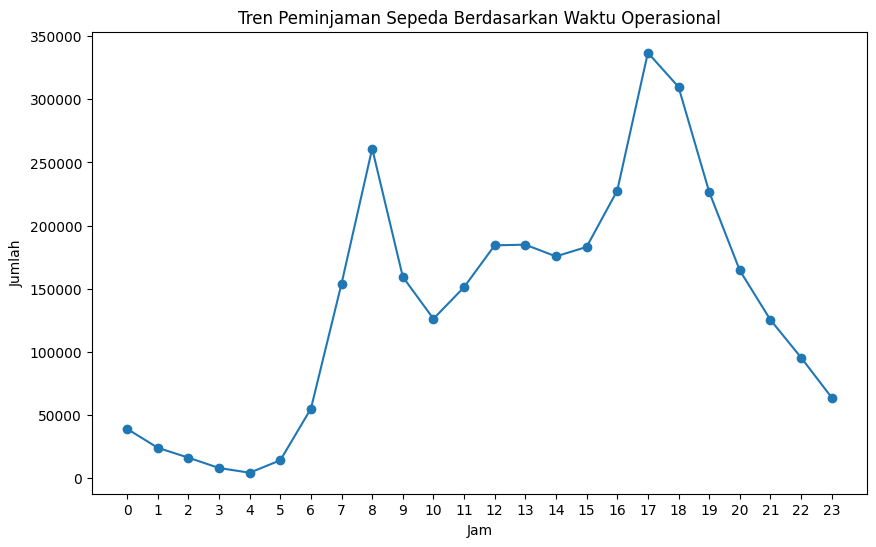

In [ ]:
tren_per_jam = hour_df.groupby(by=['hr']).cnt.sum()

# Membuat plot
tren_per_jam.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Tren Peminjaman Sepeda Berdasarkan Waktu Operasional')
plt.xlabel('Jam')
plt.ylabel('Jumlah')

# Menyesuaikan label sumbu x untuk menampilkan semua jam
plt.xticks(ticks=tren_per_jam.index, labels=tren_per_jam.index)
plt.show()

Berdasarkan grafik, tren penyewaan sepeda berdasarkan waktu operasional mengalami fluktuasi. Grafik menunjukkan peningkatan penyewaan mulai dari pukul 5 pagi hingga 8 pagi, dan pukul 15 hingga 17. Grafik bergerak turun mulai dari pukul 18 hingga 20. Menurut data tersebut, traffic tertinggi adalah pada pukul 17, sedangkan yang terendah adalah pada pukul 4 pagi.

## Conclusion

- Tren penyewaan sepeda pada tahun 2012  mengalami peningkatan pesat jika dibandingkan dengan tahun 2011.
- Berdasarkan pola perkembangan penyewaan sepeda tahun 2011 dan 2012, jumlah penyewaan sepeda yang cukup tinggi terjadi dari bulan 6 hingga 10 setiap tahunnya.
- Berdasarkan data, musim cukup memberikan pengaruh pada besarnya jumlah penyewaan sepeda. Musim gugur (fall) adalah musim dengan persentase penyewaan sepeda terbanyak, diikuti dengan musim panas (summer), musim salju (winter) dan yang terendah adalah pada musim semi (spring).
- Menurut waktu operasional, penyewaan sepeda tertinggi adalah pada pukul 17, sedangkan yang terendah adalah pukul 4 pagi.

## Menyimpan berkas data yang sudah dibersihkan

In [ ]:
day_df.to_csv("day_rev.csv", index=False)
hour_df.to_csv("hour_rev.csv", index=False)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,2011,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,2011,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,2011,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,2011,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,2011,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1
